In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import randn
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from numpy.linalg import inv

from sklearn.datasets import load_boston

### Normally distributed data

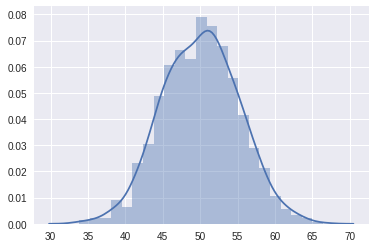

In [4]:
normal_data = 5 * randn(1000) + 50  # mean = 50, std = 5
sns.distplot(normal_data)

### Real data

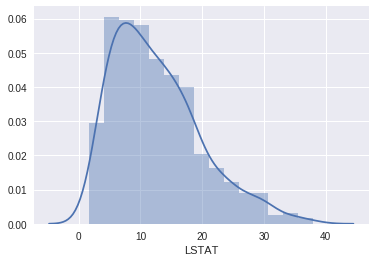

In [3]:
boston = load_boston(return_X_y=False)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df.head()
sns.distplot(df['LSTAT'], kde=True)

# Проверка на нормальность

## Quantile-Quantile plot

### Normally distributed data

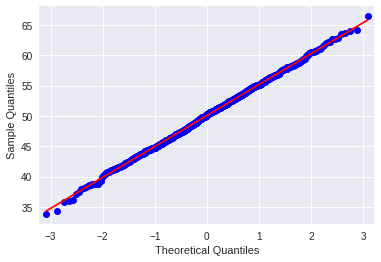

(<matplotlib.figure.Figure at 0x7f1c0431f6a0>, None)

In [5]:
qqplot(normal_data, line='s'), plt.show()

Normal distribution lies right on diagonal line. Small deviations are caused by small sample size. 

### Real data

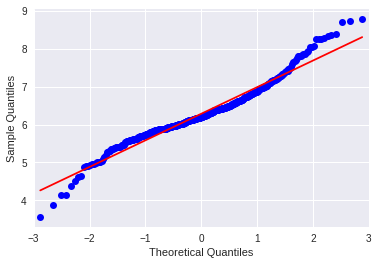

(<matplotlib.figure.Figure at 0x7f1bffbf8470>, None)

In [6]:
qqplot(df['RM'], line='s'), plt.show()

# Anderson–Darling test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/P-value_in_statistical_significance_testing.svg/400px-P-value_in_statistical_significance_testing.svg.png)


### Normally distributed data

In [7]:
test_statistic, p_value = stats.normaltest(normal_data)
print(f'test_statistic: {test_statistic}')
print(f'p_value: {p_value}')

test_statistic: 0.3797955278733316
p_value: 0.8270436833116785


$p\_value = P(\chi^2 < -test\_statistic \text{ or } \chi^2 > test\_statistic \,|\, H_0 = [x \sim Normal])$ 

$p\_value > 0.05$ $\Rightarrow$ H_0 is not rejected $\Rightarrow$ *normal distr*


### Real data

In [8]:
test_statistic, p_value = stats.normaltest(df['LSTAT'])
print(f'test_statistic: {test_statistic}')
print(f'p_value: {p_value}')

test_statistic: 57.20741558175866
p_value: 3.7806593212903944e-13


## Shapiro-Wilk test

$W = {\left(\sum_{i=1}^n a_i x_{(i)}\right)^2 \over \sum_{i=1}^n (x_i-\overline{x})^2}$ - test statistic 

where
* $(a_1,\dots,a_n) = {m^{\mathsf{T}} V^{-1} \over (m^{\mathsf{T}} V^{-1}V^{-1}m)^{1/2}}$
* $\overline{x} = \left( x_1 + \cdots + x_n \right)$
* $m = (m_1,\dots,m_n)^{\mathsf{T}}$ -  expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution
* $V$ -  covariance matrix of those order statistics

---
**Interpretation**

The null-hypothesis (H0) of this test is that the population is normally distributed. Thus, on the one hand, if the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p-value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected (e.g., for an alpha level of 0.05, a data set with a p-value of 0.05 rejects the null hypothesis that the data are from a normally distributed population).

### Normally distributed data

In [9]:
test_statistic, p_value = stats.shapiro(normal_data)
print(f'test_statistic: {test_statistic}')
print(f'p_value: {p_value}')

test_statistic: 0.9991170763969421
p_value: 0.9264519810676575


p-value > 0.05, hence we cannot reject the hypothesis that the sample comes from a population which has a normal distribution (fail to reject H0)

### Real data

In [10]:
test_statistic, p_value = stats.shapiro(df['LSTAT'])
p_value

8.285112504911873e-14

Sample does not look like normal (reject H0)